In [36]:
graphics_toolkit('gnuplot')
pkg load interval
addpath(genpath('./octave-interval-examples/m'))


In [37]:
load Temp20200601.mat
t = therm(7:8, :);
line_1 = therm(7, :);
line_2 = therm(8, :);
s = size(line_1);
x = 1:s(2);


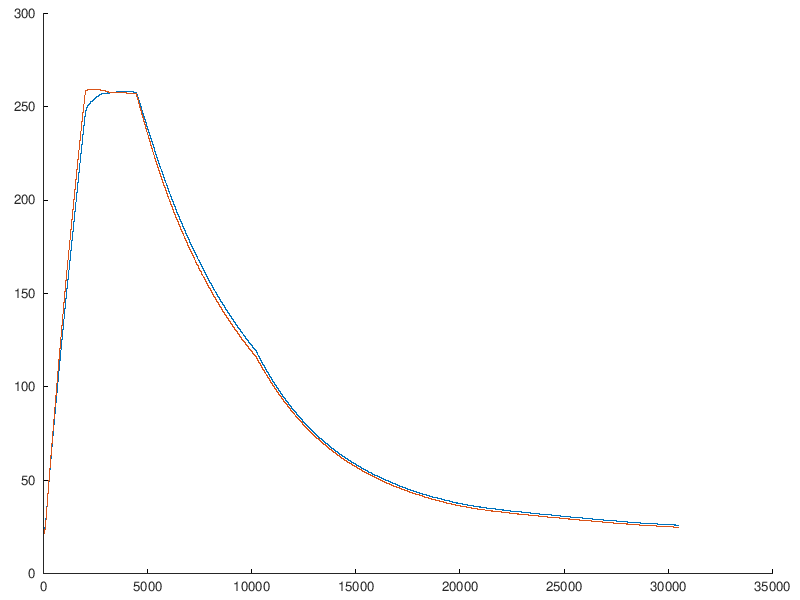

In [38]:
figure(1, 'position',[0, 0, 800, 600]);
%grid on
hold on
plot(x, line_1)
plot(x, line_2)


Линейный участок примерно в [100, 2000]. Необходимо исследовать область линейности функций: определить этот участок точнее.

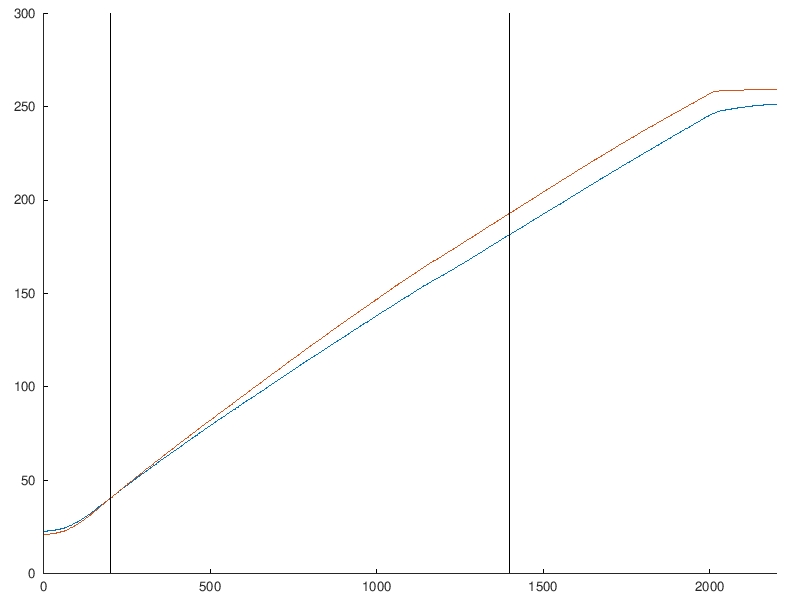

In [39]:
figure(1, 'position',[0, 0, 800, 600]);
%grid on
hold on
plot(x, line_1)
plot(x, line_2)
plot([200, 200], [0, 300], "k")
plot([1400,1400], [0, 300], "k")
xlim([0, 2200])

In [40]:
left_threshold = 1
right_threshold = 500


data_1 = line_1(left_threshold:right_threshold);
data_2 = line_2(left_threshold:right_threshold);
indexes = x(left_threshold:right_threshold);

left_threshold = 1
right_threshold = 500


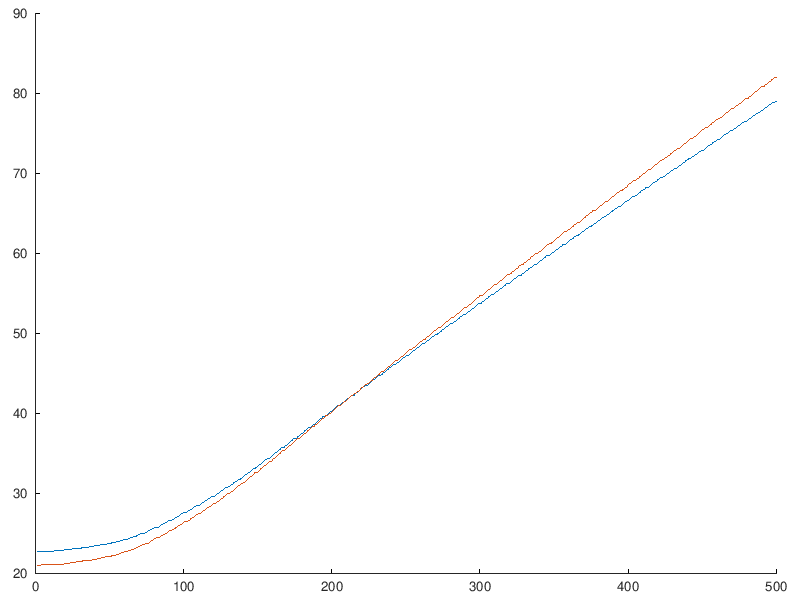

In [41]:
figure(1, 'position',[0, 0, 800, 600]);
hold on
plot(indexes, data_1)
plot(indexes, data_2)

left_threshold_2 = 1000
right_threshold_2 = 2000


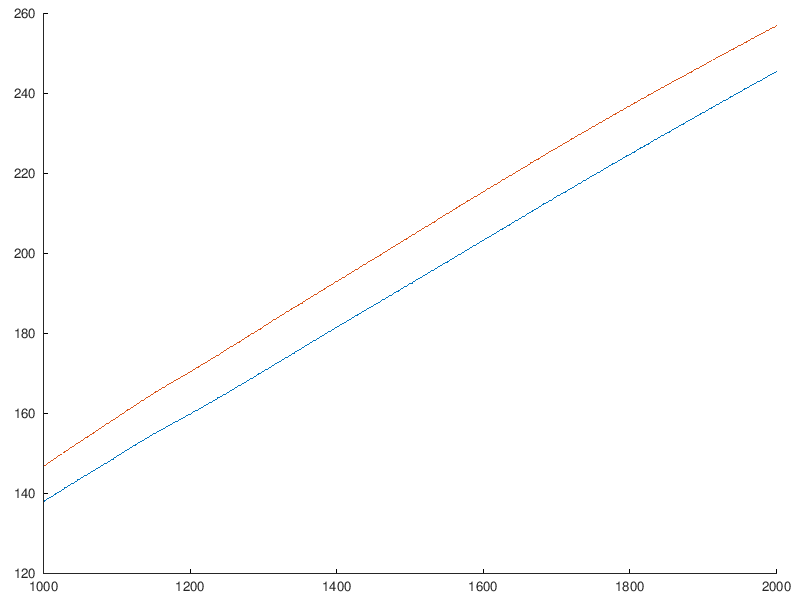

In [42]:
left_threshold_2 = 1000
right_threshold_2 = 2000


data_3 = line_1(left_threshold_2:right_threshold_2);
data_4 = line_2(left_threshold_2:right_threshold_2);
indexes_2 = x(left_threshold_2:right_threshold_2);
figure(1, 'position',[0, 0, 800, 600]);
hold on
plot(indexes_2, data_3)
plot(indexes_2, data_4)

n = 10
start_i = 1
step = 40
end_i = 400
inds =

     1    41    81   121   161   201   241   281   321   361



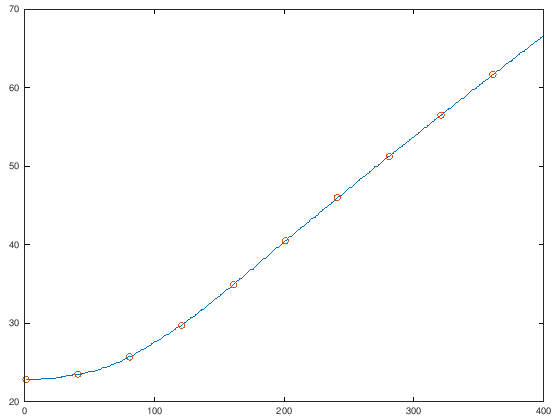

In [43]:
n = 10
start_i = 1
step = 40
end_i = n*step
inds = [start_i:step:end_i]

figure
plot(indexes(start_i:end_i), data_1(start_i:end_i), "-")
hold on
plot(indexes(inds), data_1(inds), "o")

n = 10
start_i = 1
step = 100
end_i = 1000
inds =

     1   101   201   301   401   501   601   701   801   901



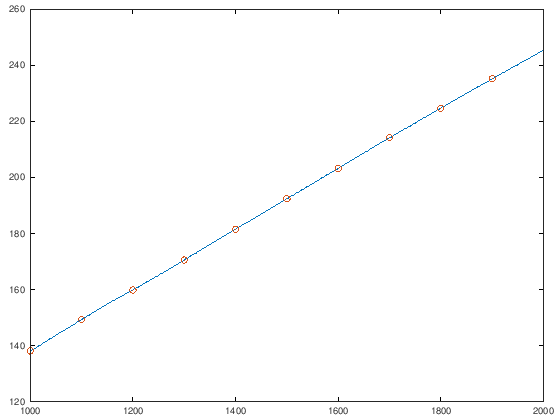

In [44]:
n = 10
start_i = 1
step = 100
end_i = n*step
inds = [start_i:step:end_i]

figure
plot(indexes_2(start_i:end_i), data_3(start_i:end_i), "-")
hold on
plot(indexes_2(inds), data_3(inds), "o")

In [65]:
## Определить задачу построения интервальной регрессии 
##     y = X * beta = beta1 + beta2 * x 
## с ограничением beta2 >= 0
n = 10
start_i = 1

%data2

% step = 100
% end_i = n*step
% inds = [start_i:step:end_i]
% x = indexes_2(inds);        
% y = data_3(inds);        



%data1
step = 40
end_i = n*step
inds = [start_i:step:end_i]
x = indexes(inds);        
y = data_1(inds); 



epsilon = zeros(1, n) + 0.1;


x = reshape(x, size(x)(2), size(x)(1));
y = reshape(y, size(y)(2), size(y)(1));
epsilon = reshape(epsilon, size(epsilon)(2), size(epsilon)(1));

X = [ x.^0 x ];                              
lb = [-inf 0];                                
irp_temp = ir_problem(X, y, epsilon, lb);  

display(x)
display(y)
display(epsilon)

n = 10
start_i = 1
step = 40
end_i = 400
inds =

     1    41    81   121   161   201   241   281   321   361

x =

     1
    41
    81
   121
   161
   201
   241
   281
   321
   361

y =

   22.80
   23.50
   25.70
   29.70
   34.90
   40.50
   46.00
   51.20
   56.50
   61.70

epsilon =

   0.100
   0.100
   0.100
   0.100
   0.100
   0.100
   0.100
   0.100
   0.100
   0.100



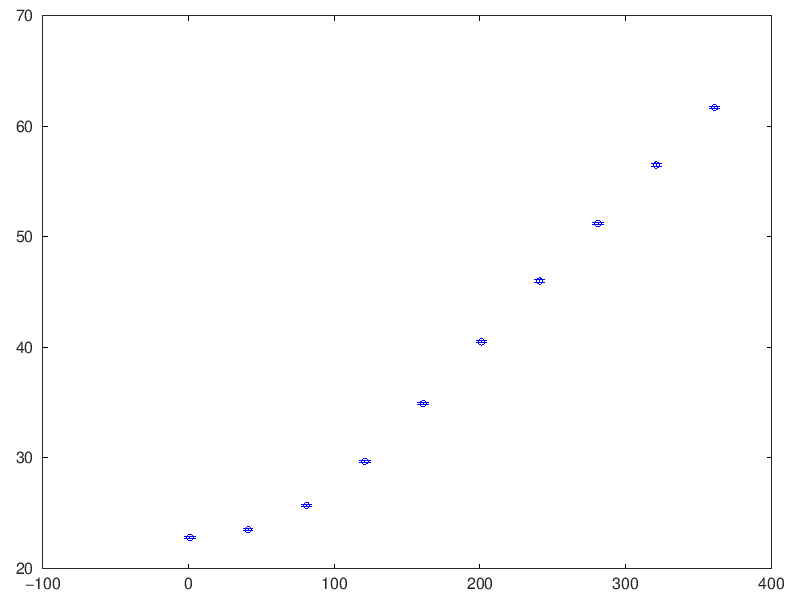

In [66]:
## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
set(gca, 'fontsize', 12)


Можно добавить график обычной МНК регрессии

b_lsm =

   18.323    0.116



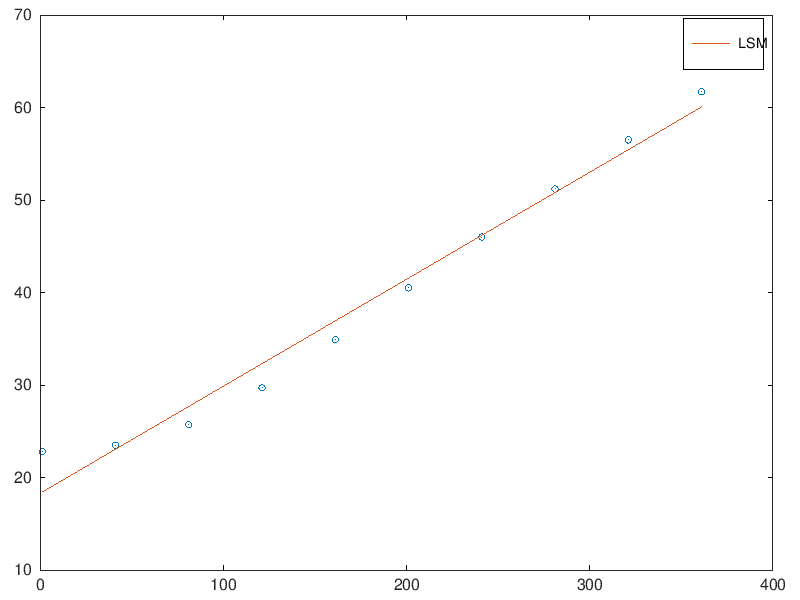

In [68]:
## Линейная регрессия МНК

b_lsm = (X \ y)'  
MNK_line = [b_lsm(1) + b_lsm(2) * min(x), b_lsm(1) + b_lsm(2) * max(x)];


figure('position',[0, 0, 800, 600]);

plot(x, y, "o")
hold on
plot([min(x),  max(x)], MNK_line)
set(gca, 'fontsize', 12)

legend("", "LSM")


QH6412 qhull input error (qh_initqhull_globals): expecting between 1 and 2147483631 points.  Got 0 0-d points

While executing:  | qhull Qt
Options selected for Qhull 2020.2.r 2020/08/31:
  run-id 250203978  Qtriangulate  _maxoutside  0
error: convhulln: qhull failed
error: called from
    ir_beta2poly at line 77 column 5
    ir_plotbeta at line 59 column 10


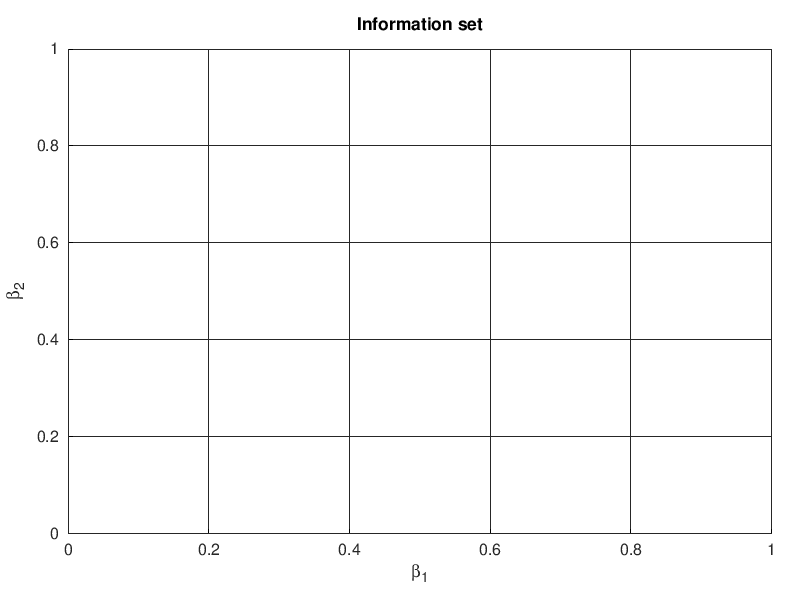

In [69]:
## Информационное множество
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

In [71]:
function [w] = linear(epsilon, x, y)
    eps = epsilon;
    m = size(x)(1)
    C = zeros(1, m + 2);
    for i = 1:m
    C(i) = 1;
    end
    display(C)
    A = zeros(2*m, m+2);

    for i = 1:m
    A(2 * i - 1, i) = eps(i);
    A(2 * i, i) = eps(i);

    A(2 * i - 1, m + 1) = 1;
    A(2 * i, m + 1) = -1;

    A(2 * i - 1, m + 2) = x(i);
    A(2 * i, m + 2) = -x(i);

    end

    display(A)

    B = zeros(1, 2*m);
    for i = 1:m
    B(2 * i - 1) = y(i);
    B(2 * i) = -y(i);
    end

    display(B)

    lb = zeros(1, m+2);
    for i = 1:m
    lb(i) = 1;
    end

    lb(m+2) = -inf;

    display(lb)

    ctype = "";
    for i = 1:2 * m
    ctype(i) = 'L';
    end

    display(ctype);

    vartype = "";
    for i = 1:m + 2
    vartype(i) = 'C';
    end

    display(vartype);

    sense = 1;
    output_precision(4)
    w = glpk(C,A,B,lb,[],ctype,vartype,sense)
endfunction

##### Решение ЗЛП

In [72]:
linear(epsilon, x, y)

m = 10
C =

   1   1   1   1   1   1   1   1   1   1   0   0

A =

 Columns 1 through 8:

     0.100         0         0         0         0         0         0         0
     0.100         0         0         0         0         0         0         0
         0     0.100         0         0         0         0         0         0
         0     0.100         0         0         0         0         0         0
         0         0     0.100         0         0         0         0         0
         0         0     0.100         0         0         0         0         0
         0         0         0     0.100         0         0         0         0
         0         0         0     0.100         0         0         0         0
         0         0         0         0     0.100         0         0         0
         0         0         0         0     0.100         0         0         0
         0         0         0         0         0     0.100         0         0
         0         

## Повторные решения задачи с удалением выбросов

In [73]:
function [x, indexes, data_1] = prep_data(line_1, left_threshold, right_threshold)
    s = size(line_1);
    x = 1:s(2);
    data_1 = line_1(left_threshold:right_threshold);
    indexes = x(left_threshold:right_threshold);
endfunction


left_threshold = 1000
right_threshold = 2000
n = 8
inds =

   100   199   298   397   496   595   694   793

inds =

   100   199   298   397   496   595   694   793

x =

   1099
   1198
   1297
   1396
   1495
   1594
   1693
   1792

y =

   149.1
   159.7
   170.2
   181.1
   191.8
   202.6
   213.3
   223.9

epsilon =

   0.100
   0.100
   0.100
   0.100
   0.100
   0.100
   0.100
   0.100

m = 8
C =

   1   1   1   1   1   1   1   1   0   0

A =

 Columns 1 through 6:

   1.000e-01           0           0           0           0           0
   1.000e-01           0           0           0           0           0
           0   1.000e-01           0           0           0           0
           0   1.000e-01           0           0           0           0
           0           0   1.000e-01           0           0           0
           0           0   1.000e-01           0           0           0
           0           0           0   1.000e-01           0           0
         

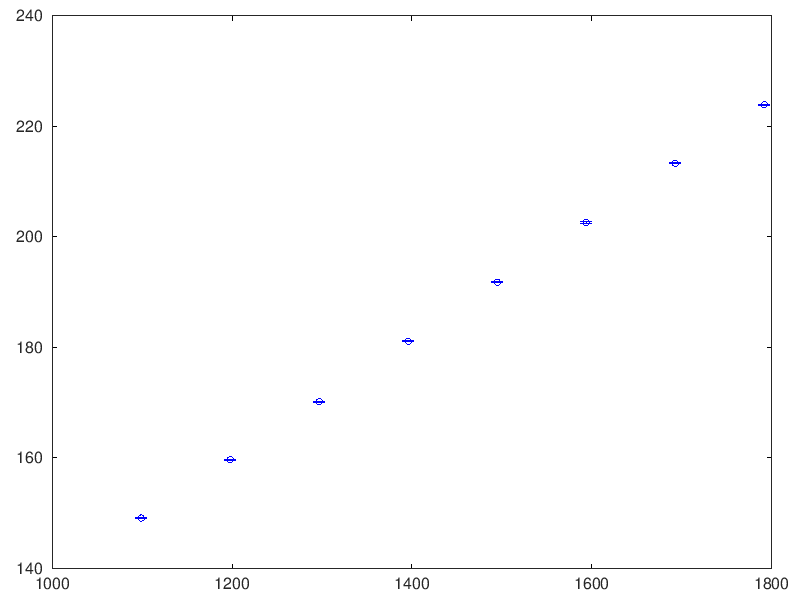

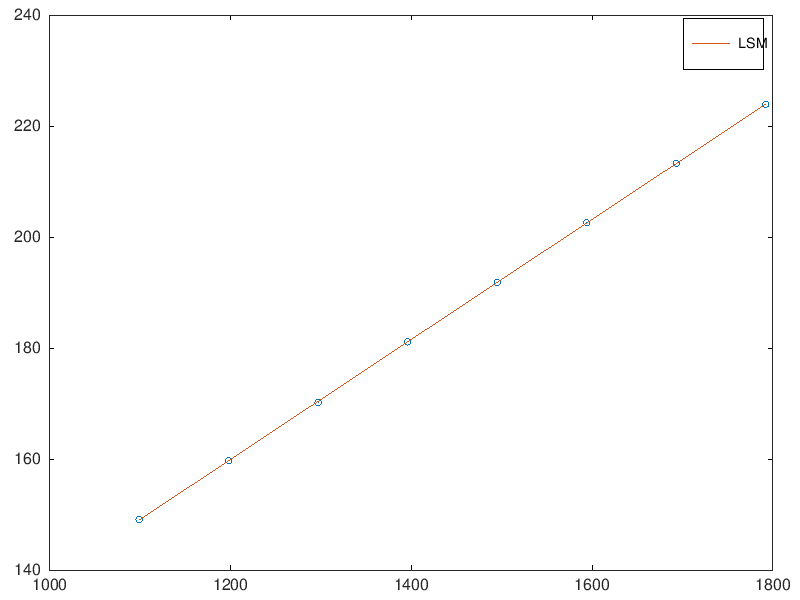

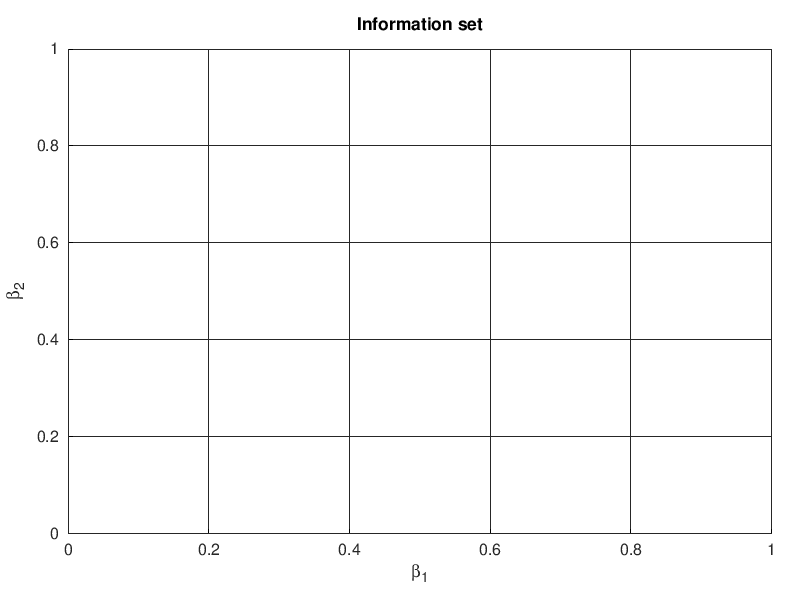

In [74]:
left_threshold = 1000
right_threshold = 2000

% [x, indexes, data_1] = prep_data(line_1,left_threshold, right_threshold);
[x, indexes_2, data_3] = prep_data(line_1,left_threshold, right_threshold);
n = 10;
start_i = 1;
step = floor((right_threshold - left_threshold - start_i) / n);
end_i = n * step;
inds = [start_i:step:end_i];
n = 8
inds = inds(:,2:9)
display(inds)

% x = indexes(inds);        
% y = data_1(inds);   

x = indexes_2(inds);        
y = data_3(inds); 

epsilon = zeros(1, n) + 0.1; 
x = reshape(x, size(x)(2), size(x)(1));
y = reshape(y, size(y)(2), size(y)(1));
epsilon = reshape(epsilon, size(epsilon)(2), size(epsilon)(1));
eps = epsilon;


X = [ x.^0 x ];                              
lb = [-inf 0];                                
irp_temp = ir_problem(X, y, epsilon, lb);

display(x)
display(y)
display(epsilon)

# ЗЛП
w = linear(epsilon, x, y);
## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
set(gca, 'fontsize', 12)

## Линейная регрессия МНК

b_lsm = (X \ y)'  
MNK_line = [b_lsm(1) + b_lsm(2) * min(x), b_lsm(1) + b_lsm(2) * max(x)];



figure('position',[0, 0, 800, 600]);

plot(x, y, "o")
hold on
plot([min(x),  max(x)], MNK_line)
set(gca, 'fontsize', 12)

legend("", "LSM")

## Графическое представление информационного множества
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

#### Коридор совместных зависимостей

scale = 2.000


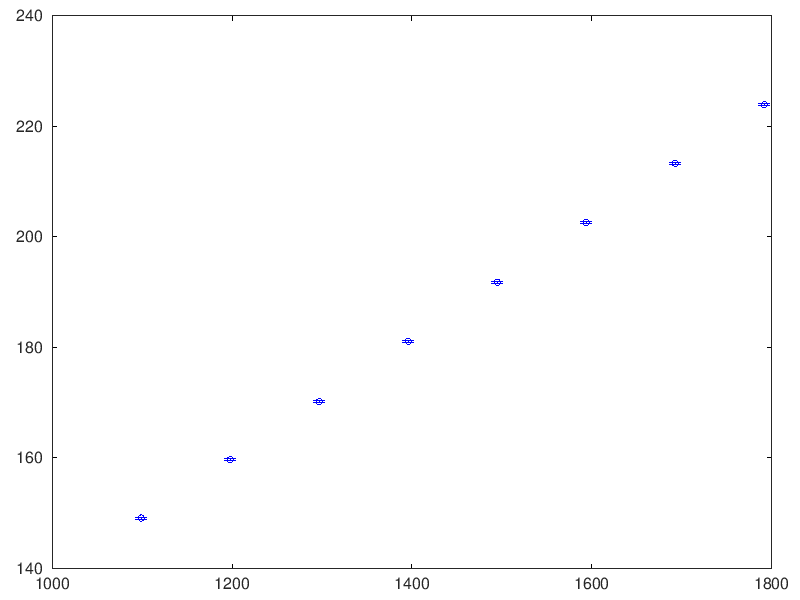

In [75]:
scale = max(w(1:n))
for i = 1:n
    eps(i) = epsilon(i) * scale;
end

X = [ x.^0 x ];                               # матрица значений переменных при beta1 и beta2
lb = [-inf 0];                                # нижние границы beta1 и beta2
irp_temp = ir_problem(X, y, eps, lb);    # создание переменной, содержащей описание задачи 


## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
# xlim([0 22])
# ylim([-10 260])
set(gca, 'fontsize', 12)
#title('Steam generator performance');
#xlabel('Fuel consumption');
#ylabel('Steam quantity');


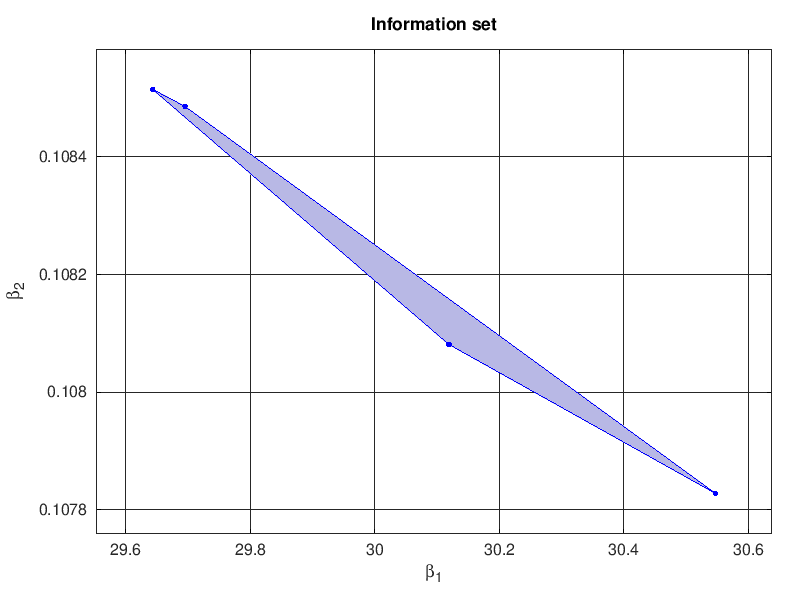

In [76]:
## Информационное множество
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')


In [77]:
## Вершины информационного множества задачи построения интервальной регрессии
vertices = ir_beta2poly(irp_temp)

## Диаметр и наиболее удаленные вершины информационного множества 
[rhoB, b1, b2] = ir_betadiam(irp_temp)

vertices =

   29.643    0.109
   30.119    0.108
   30.119    0.108
   30.547    0.108
   29.695    0.108

rhoB = 0.903
b1 =

   30.547    0.108

b2 =

   29.643    0.109



In [56]:
## Внешние интервальние оценки параметров модели y = beta1 + beta2 * x 
b_int = ir_outer(irp_temp)

b_int =

   29.643   30.547
    0.108    0.109



In [57]:
## Точечные оценки параметров 
b_maxdiag = (b1 + b2) / 2    # как середина наибольшей диагонали информационного множества

b_gravity = mean(vertices)   # как центр тяжести информационного множества 

b_lsm = (X \ y)'             # методом наименьших квадратов

b_maxdiag =

   30.095    0.108

b_gravity =

   30.025    0.108

b_lsm =

   30.110    0.108



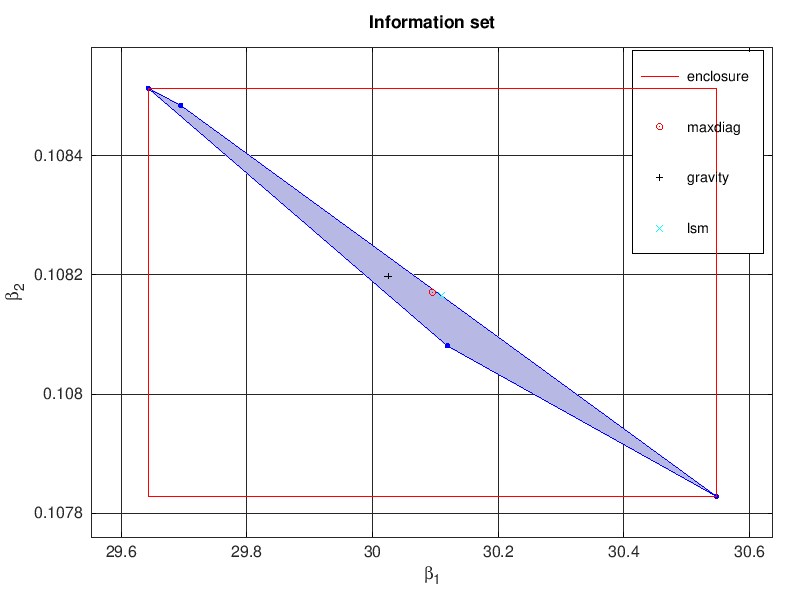

In [58]:
## Внешняя интервальная оценка информационного множества
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
hold on
ir_plotrect(b_int,'r-')
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

## Точечные оценки
plot(b_maxdiag(1), b_maxdiag(2), 'ro')
plot(b_gravity(1), b_gravity(2), 'k+')
plot(b_lsm(1), b_lsm(2), 'cx')
legend("", "", "enclosure", "maxdiag",  "gravity", "lsm")


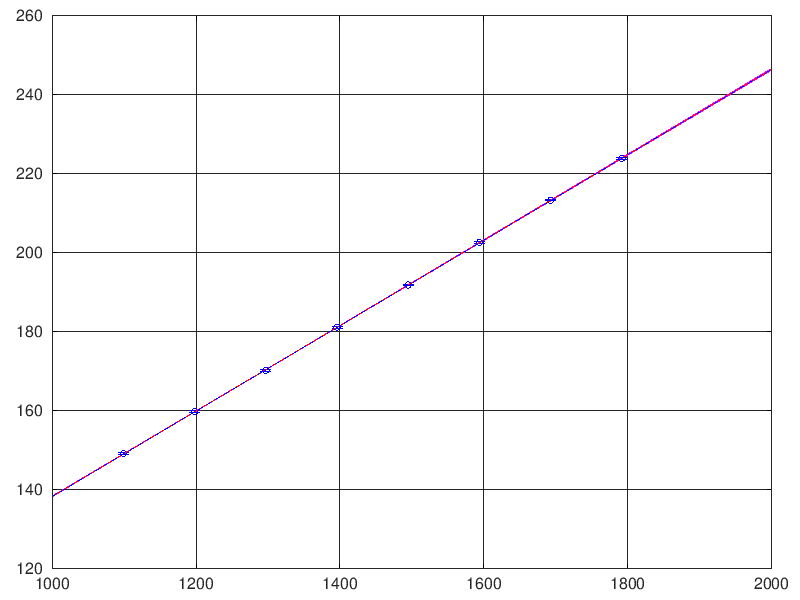

In [59]:
## Коридор совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [1000 2000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
# ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)
# xlabel('Fuel consumtion')
# ylabel('Steam quantity')
# title('Set of models compatible with data and constraints')

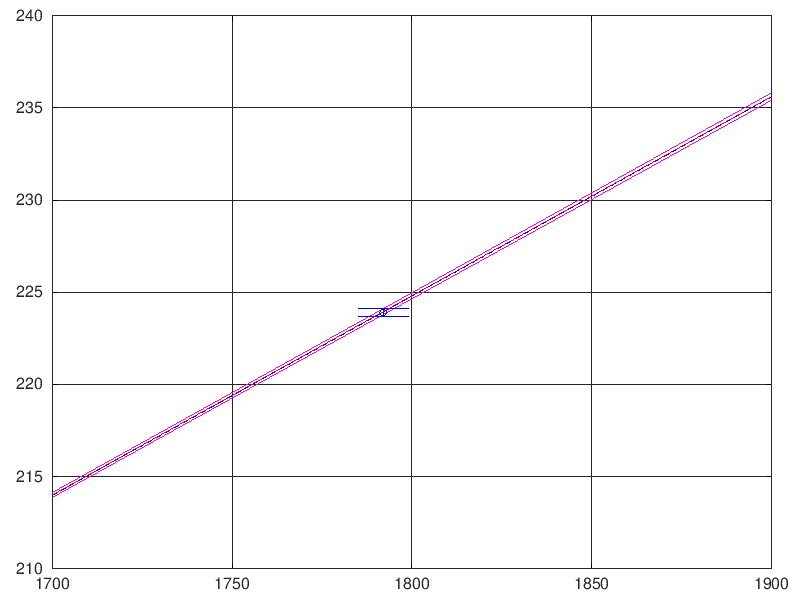

In [60]:
## Коридор совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [1100 2000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
# ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)
# xlabel('Fuel consumtion')
# ylabel('Steam quantity')
# title('Set of models compatible with data and constraints')

xlim([1700,1900])
ylim([210,240])

### Предсказание значений функции

In [61]:
## Значения функции, предсказанные с помощью модели y = beta1 + beta2 * x в точках эксперимента
yp0 = ir_predict(irp_temp, X)       # интервальный прогноз значений y в точках x

yp0mid = mean(yp0,2)                 # средние значения прогнозных интервалов
yp0rad = 0.5 * (yp0(:,2) - yp0(:,1)) # радиус прогнозных интервалов

yp0rad_rel = 100 * yp0rad ./ yp0mid  # относительная величина неопределенности прогнозов в процентах

yp0 =

   148.9   149.1
   159.6   159.7
   170.3   170.4
   181.0   181.1
   191.7   191.9
   202.4   202.6
   213.1   213.4
   223.8   224.1

yp0mid =

   149.0
   159.7
   170.4
   181.1
   191.8
   202.5
   213.2
   223.9

yp0rad =

   0.07501
   0.06251
   0.05000
   0.07000
   0.09000
   0.11000
   0.13000
   0.16251

yp0rad_rel =

   0.05035
   0.03915
   0.02935
   0.03866
   0.04693
   0.05432
   0.06097
   0.07257



In [62]:
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x в точках наблюдения неопределенности 
xp = [1000; 1200; 1400; 1600; 1800]      # точки наблюдения
Xp = [xp.^0 xp];
output_precision(4)

yp = ir_predict(irp_temp, Xp)         # интервальный прогноз значений y в точках xp
ypmid = mean(yp,2)                     # средние значения прогнозных интервалов
yprad = 0.5 * (yp(:,2) - yp(:,1))      # радиус прогнозных интервалов

yprad_relative = 100 * yprad ./ ypmid  # относительная величина неопределенности прогнозов в процентах

xp =

   1000
   1200
   1400
   1600
   1800

yp =

   138.2   138.4
   159.8   159.9
   181.4   181.6
   203.0   203.3
   224.6   225.0

ypmid =

   138.3
   159.9
   181.5
   203.2
   224.8

yprad =

   0.10894
   0.06225
   0.07081
   0.11122
   0.16525

yprad_relative =

   0.07879
   0.03894
   0.03901
   0.05474
   0.07351



### Граничные точки

In [63]:
# Поиск граничных точек
MY_EPS = 0.00001;
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x в точках эксперимента
irp_temp;
cur_x = irp_temp.y;
cur_eps = irp_temp.epsilon;

yp0 = ir_predict(irp_temp, X); 

for i = 1:n
x_top = cur_x(i) + cur_eps(i);
x_bot = cur_x(i) - cur_eps(i);

y_top = yp0(i, 2);
y_bot = yp0(i, 1);

if abs(y_top - x_top) < MY_EPS
    display(i)
    
end

if abs(y_bot - x_bot) < MY_EPS
    display(i)
end


end



i = 1
i = 3
i = 6
i = 7
i = 8


m = 8


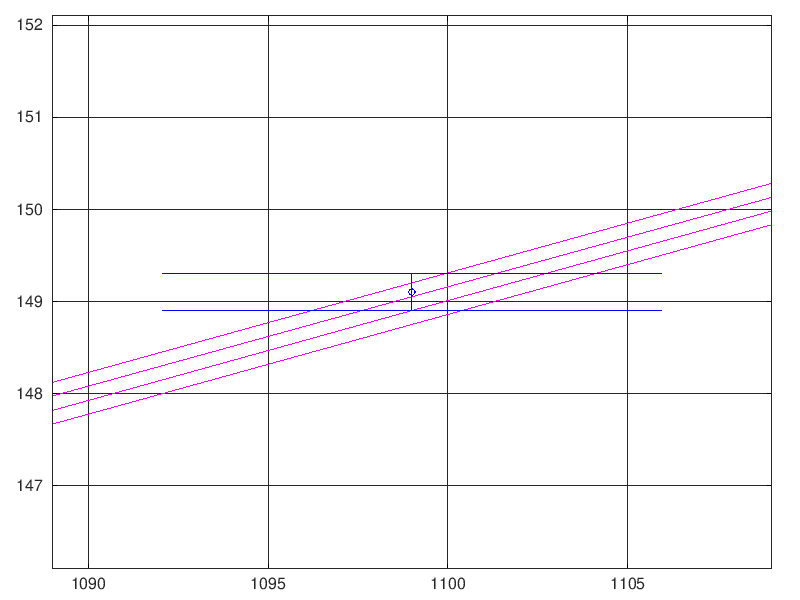

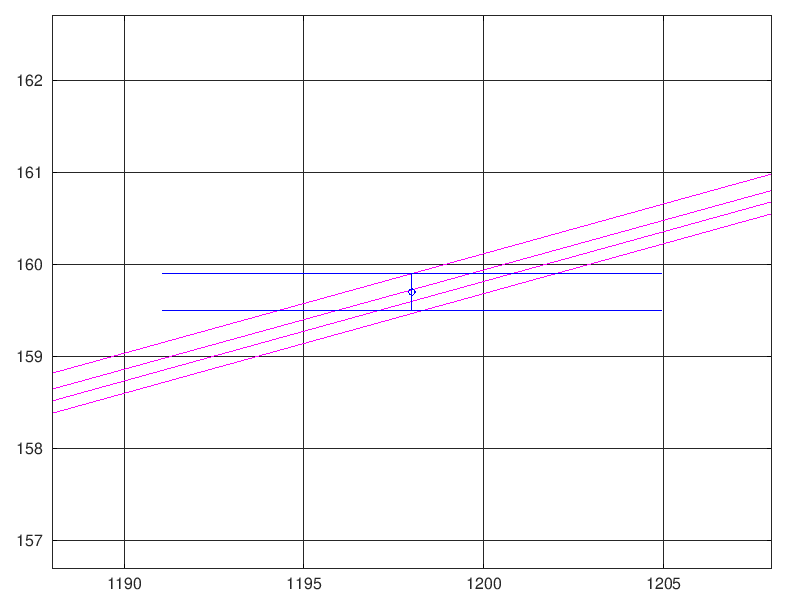

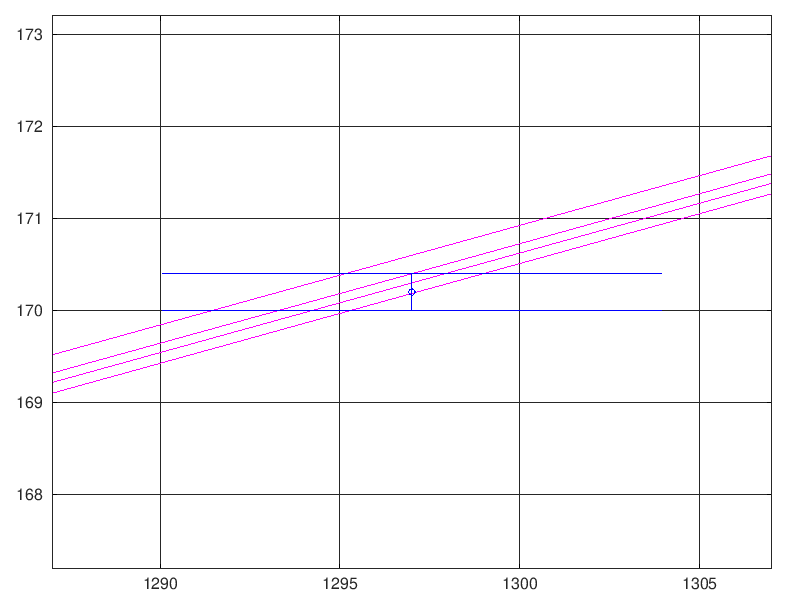

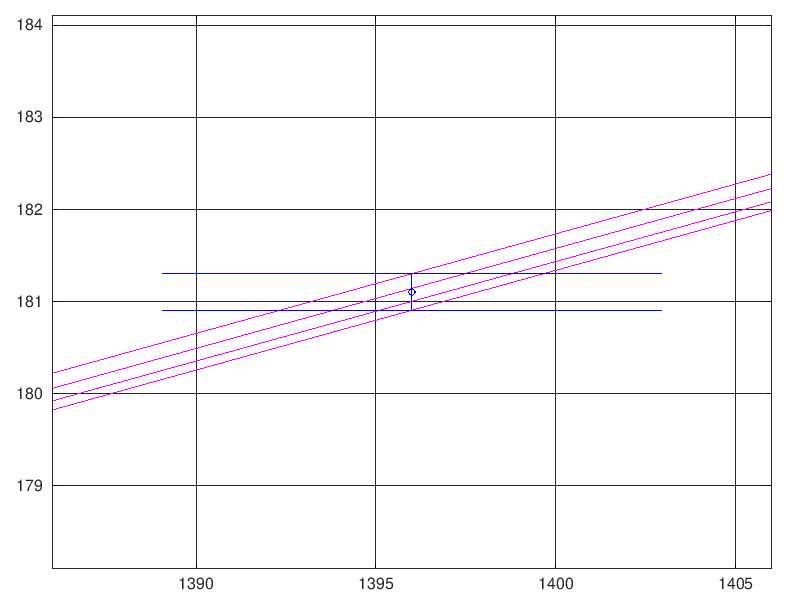

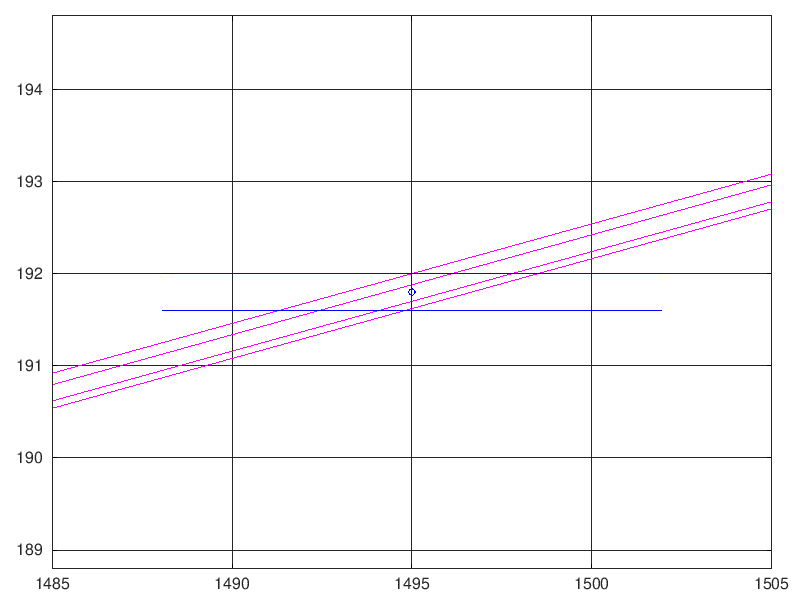

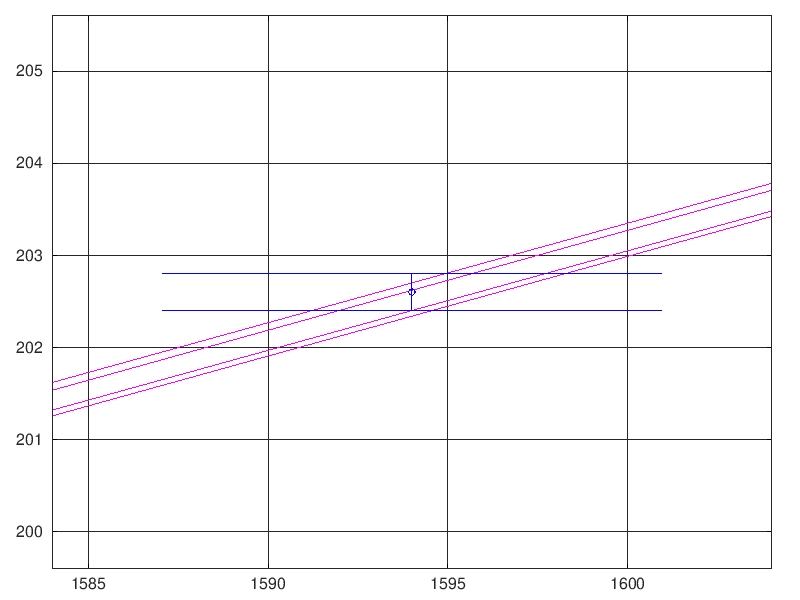

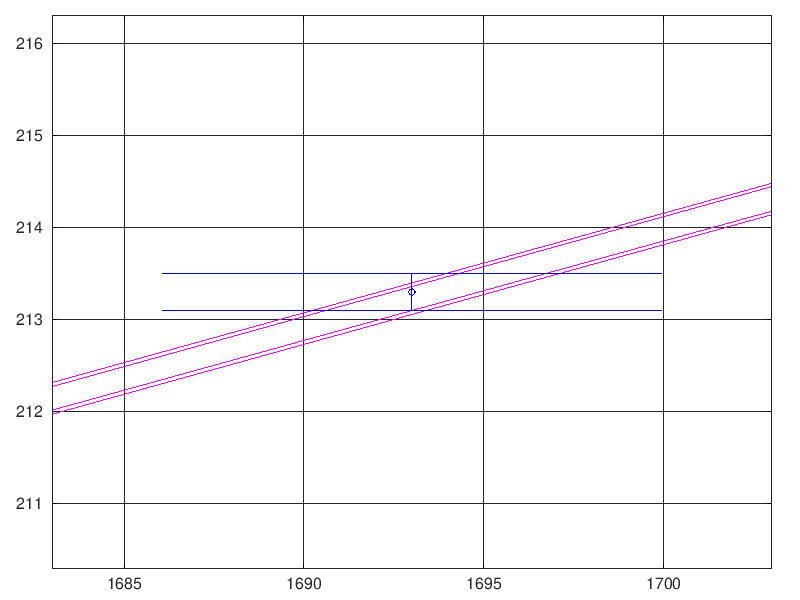

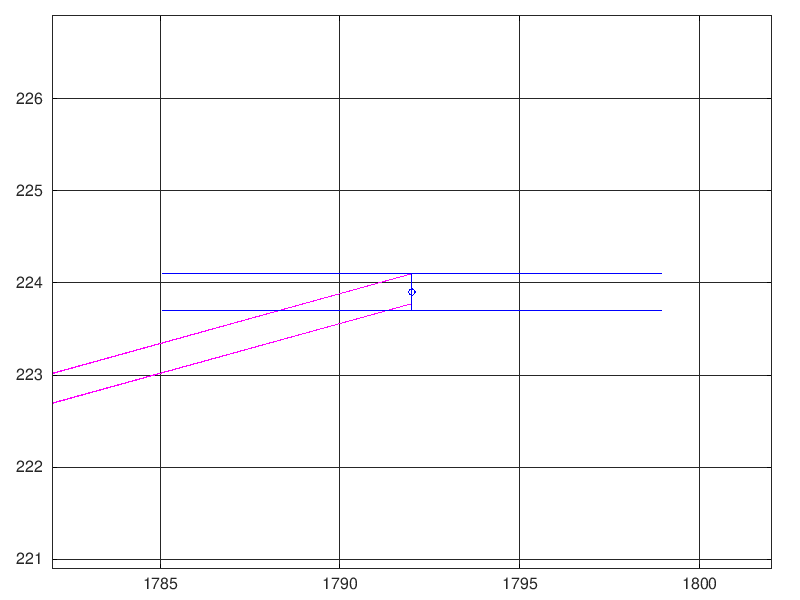

In [64]:
# Граничные точки, графики 
border_x = [-10, 10];
border_y = [-3, 3];
m = n
for i = 1:m

cur_point_x = x(i);
cur_point_y = y(i);

figure('position',[0, 0, 800, 600]);
xlimits = [0 500];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей
hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
grid on
set(gca, 'fontsize', 12)

xlim([cur_point_x + border_x(1), cur_point_x + border_x(2)]);
ylim([cur_point_y + border_y(1), cur_point_y + border_y(2)]);


end